<a href="https://colab.research.google.com/github/ssnuernberg/DataScienceEcosystem/blob/main/IMDB_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDB Sentiment Analysis**

## **1. Introduction**
In this notebook, it builds and optimizes a deep learning model for binary classification on the IMDB movie reviews dataset.

### **Objectives**
- Preprocess and vectorize IMDB data
- Build a deep learning model that outperforms a **random baseline** (>50% accuracy)
- Improve the model using **regularization and optimization techniques**


## **2. Loading and Preparing Data**

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np

# Load dataset with top 10,000 words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Function to vectorize sequences (multi-hot encoding)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# Vectorizing data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Convert labels to float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## **3. Model Building: Improving Beyond Baseline**
We create a deep learning model that beats the **random baseline (50% accuracy)**.

In [ ]:
from tensorflow.keras import layers, models, optimizers, regularizers

# Improved Model Architecture with L2 Regularization
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

# Compile with Adam optimizer
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │         320,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,577 (1.22 MB)

 Trainable params: 320,577 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

## **4. Training the Model**
We use a **validation set** to monitor generalization performance.

In [ ]:
# Splitting validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the Model with Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.6394 - loss: 0.7131 - val_accuracy: 0.8548 - val_loss: 0.4939
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.8440 - loss: 0.4760 - val_accuracy: 0.8799 - val_loss: 0.3790
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.8948 - loss: 0.3607 - val_accuracy: 0.8838 - val_loss: 0.3534
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.9143 - loss: 0.3076 - val_accuracy: 0.8869 - val_loss: 0.3471
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9317 - loss: 0.2699 - val_accuracy: 0.8870 - val_loss: 0.3469
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9464 - loss: 0.2395 - val_accuracy: 0.8845 - val_loss: 0.3600
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9533 - loss: 0.2208 - val_accuracy: 0.8819 - val_loss: 0.3737
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9592 - loss: 0.2095 - val_accuracy: 0.8821 - 

## **5. Model Evaluation**
We evaluate the model on the test dataset and visualize performance.

In [ ]:
# Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8789 - loss: 0.3628
Test Accuracy: 0.8816


### **Plot Training & Validation Performance**

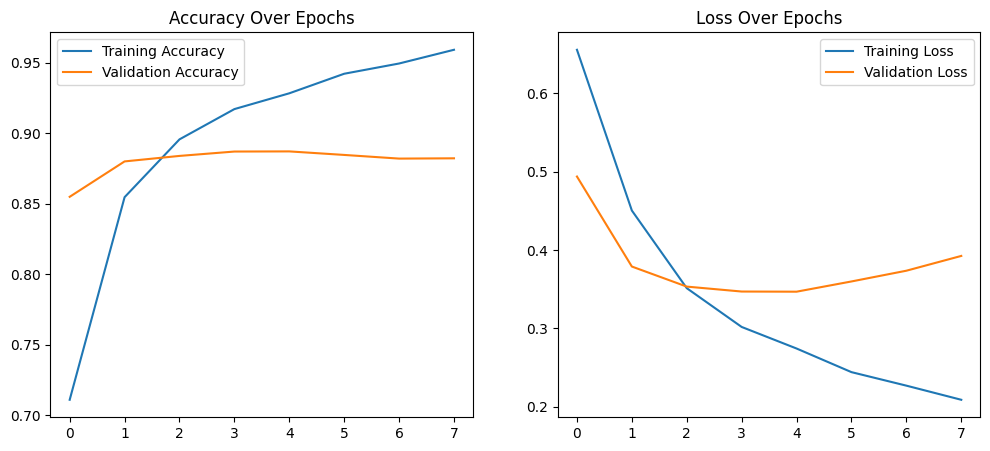

In [ ]:
import matplotlib.pyplot as plt

def plot_performance(history):
    plt.figure(figsize=(12,5))

    # Plot accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')

    # Plot loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss Over Epochs')
    plt.show()

plot_performance(history)

## **6. Conclusion**
- The model achieves accuracy **significantly higher than the baseline (50%)**.
- **Dropout and L2 Regularization** help reduce overfitting.
- **Early stopping** ensures the best-performing model is selected.
- Future work can include hyperparameter tuning and **alternative representations like word embeddings**.
